In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import copy

In [2]:
image_filenames = ['mcon1.jpg', 'mcon2.jpg', 'mcon3.jpg', 'mcon4.jpg', 'mcon5.jpg', 'mcon6.jpg']
images_directory = "./images/electronics"
# images_directory = "/usercode/images/electronics"
# Load the images
images = [cv2.imread(os.path.join(images_directory, filename)) for filename in image_filenames]

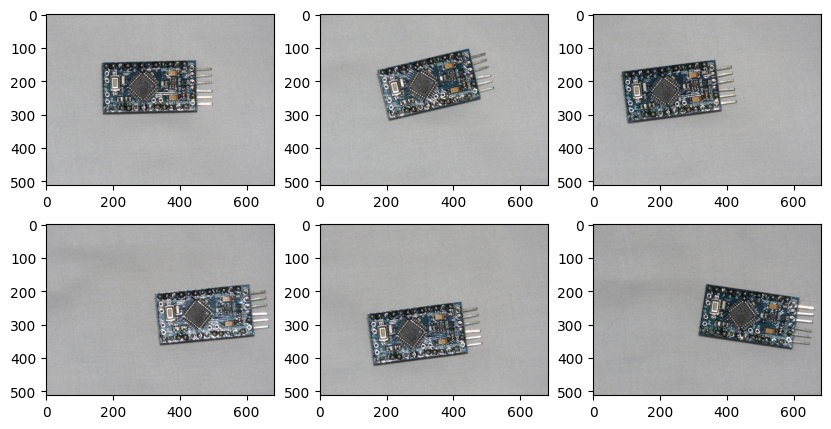

In [3]:
# Display a few images
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
for img_ndx in range(6):
    axs[img_ndx//3, img_ndx%3].imshow(cv2.cvtColor(images[img_ndx], cv2.COLOR_BGR2RGB))

In [4]:
# Convert the images to grayscale
grayscale_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]

In [5]:
# Create corner templates
template_sizeHW = (17, 17)
template_center = (template_sizeHW[1]//2, template_sizeHW[0]//2)

template_NW = 255 * np.ones(template_sizeHW, dtype=np.uint8)
cv2.rectangle(template_NW, template_center, (template_sizeHW[1] - 1, template_sizeHW[0] - 1), 0, thickness=-1)
template_NE = 255 * np.ones(template_sizeHW, dtype=np.uint8)
cv2.rectangle(template_NE, template_center, (0, template_sizeHW[0] - 1), 0, thickness=-1)
template_SE = 255 * np.ones(template_sizeHW, dtype=np.uint8)
cv2.rectangle(template_SE, template_center, (0, 0), 0, thickness=-1)
template_SW = 255 * np.ones(template_sizeHW, dtype=np.uint8)
cv2.rectangle(template_SW, template_center, (template_sizeHW[1] - 1, 0), 0, thickness=-1)
templates = [template_NW, template_NE, template_SE, template_SW]

In [6]:
# Blur the grayscale images and the templates
blur_size = (5, 5)
for img_ndx in range(len(grayscale_images)):
    grayscale_images[img_ndx] = cv2.blur(grayscale_images[img_ndx], blur_size)
for template_ndx in range(len(templates)):  
    templates[template_ndx] = cv2.blur(templates[template_ndx], blur_size)

In [7]:
# Match the grayscale images with each template
match_NW_imgs = []
match_NE_imgs = []
match_SE_imgs = []
match_SW_imgs = []
for grayscale_img in grayscale_images:
    match_NW_img = cv2.matchTemplate(grayscale_img, templates[0], cv2.TM_CCOEFF_NORMED)
    match_NW_imgs.append(match_NW_img)
    match_NE_img = cv2.matchTemplate(grayscale_img, templates[1], cv2.TM_CCOEFF_NORMED)
    match_NE_imgs.append(match_NE_img)
    match_SE_img = cv2.matchTemplate(grayscale_img, templates[2], cv2.TM_CCOEFF_NORMED)
    match_SE_imgs.append(match_SE_img)
    match_SW_img = cv2.matchTemplate(grayscale_img, templates[3], cv2.TM_CCOEFF_NORMED)
    match_SW_imgs.append(match_SW_img)

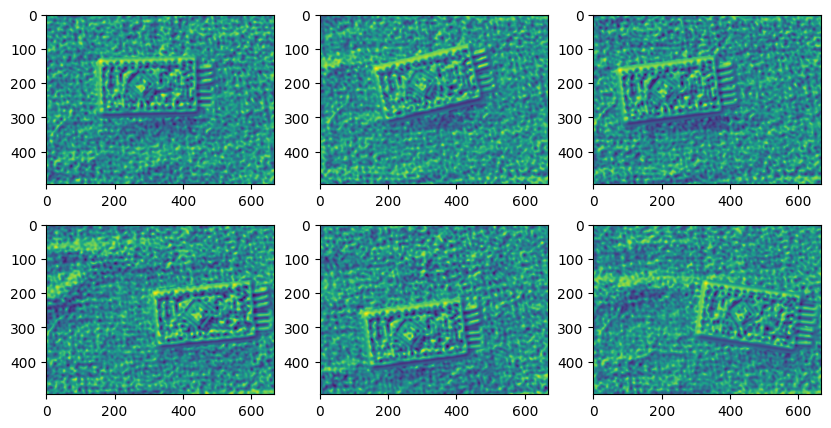

In [8]:
# Display the NW match images
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
for img_ndx in range(6):
    axs[img_ndx//3, img_ndx%3].imshow(match_NW_imgs[img_ndx])

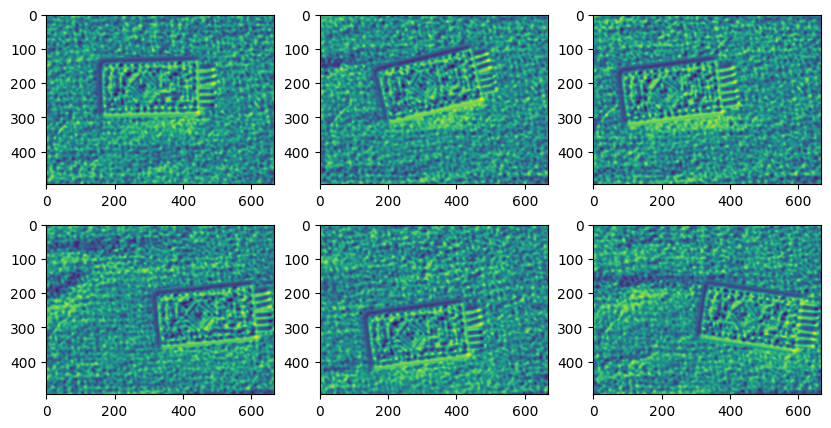

In [9]:
# Display the SE match images
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
for img_ndx in range(6):
    axs[img_ndx//3, img_ndx%3].imshow(match_SE_imgs[img_ndx])

((168, 145), (449, 139), (453, 294), (170, 300))
((172, 166), (447, 104), (480, 256), (205, 319))
((87, 172), (366, 138), (385, 293), (104, 327))
((327, 209), (609, 181), (623, 337), (341, 364))
((143, 269), (424, 233), (442, 389), (160, 424))
((338, 180), (618, 220), (597, 376), (316, 335))


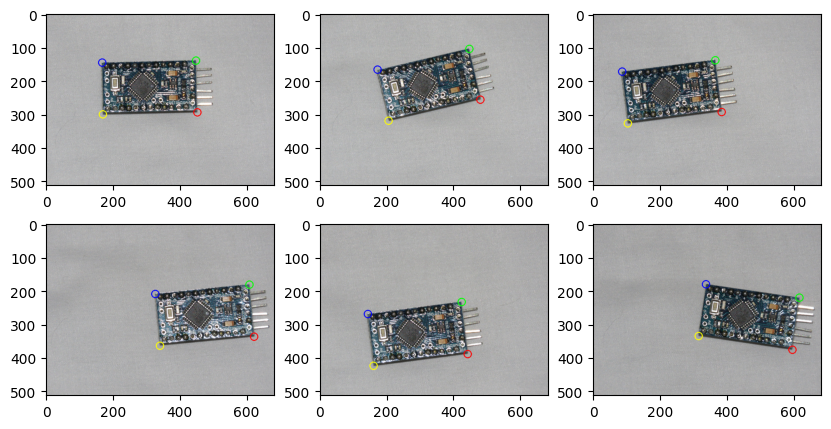

In [10]:
# Get the maximum match locations
corner_NW_list = []
for match_img in match_NW_imgs:
    _, max_val, _, max_loc = cv2.minMaxLoc(match_img)
    corner_NW_list.append((max_loc[0] + template_sizeHW[1]//2, max_loc[1] + template_sizeHW[0]//2))
corner_NE_list = []
for match_img in match_NE_imgs:
    _, max_val, _, max_loc = cv2.minMaxLoc(match_img)
    corner_NE_list.append((max_loc[0] + template_sizeHW[1]//2, max_loc[1] + template_sizeHW[0]//2))
corner_SE_list = []
for match_img in match_SE_imgs:
    _, max_val, _, max_loc = cv2.minMaxLoc(match_img)
    corner_SE_list.append((max_loc[0] + template_sizeHW[1]//2, max_loc[1] + template_sizeHW[0]//2))
corner_SW_list = []
for match_img in match_SW_imgs:
    _, max_val, _, max_loc = cv2.minMaxLoc(match_img)
    corner_SW_list.append((max_loc[0] + template_sizeHW[1]//2, max_loc[1] + template_sizeHW[0]//2))

# Draw the maximum match of each corner
annotated_images = []
for img_ndx in range(len(images)):
    annotated_img = copy.deepcopy(images[img_ndx])
    # NW corner
    cv2.circle(annotated_img, corner_NW_list[img_ndx], 11, (255, 0, 0), 2)
    # NE corner
    cv2.circle(annotated_img, corner_NE_list[img_ndx], 11, (0, 255, 0), 2)
    # SE corner
    cv2.circle(annotated_img, corner_SE_list[img_ndx], 11, (0, 0, 255), 2)
    # SW corner
    cv2.circle(annotated_img, corner_SW_list[img_ndx], 11, (0, 255, 255), 2)
    print(f"({corner_NW_list[img_ndx]}, {corner_NE_list[img_ndx]}, {corner_SE_list[img_ndx]}, {corner_SW_list[img_ndx]})")
    annotated_images.append(annotated_img)
# Display the images
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
for img_ndx in range(6):
    axs[img_ndx//3, img_ndx%3].imshow(cv2.cvtColor(annotated_images[img_ndx], cv2.COLOR_BGR2RGB))